<a href="https://colab.research.google.com/github/muoyo/chicago-ridesharing/blob/anesu/Chicago_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sodapy

In [0]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofchicago.org", None, timeout=100)

#Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofchicago.org",
                 "N0amD6E3UkUmVTl5nFWXbIyl4",
                 username="anesumasube@gmail.com",
                 password="Marywandi11!", timeout=1000)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("m6dm-c72p",limit=1000000, select='trip_id, trip_start_timestamp, trip_end_timestamp, trip_seconds, trip_miles, pickup_community_area, dropoff_community_area, fare, tip, additional_charges, trip_total ')
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.describe()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
count,1000000,1000000,1000000,992868,999906,937437,930766,1000000,1000000,1000000,1000000
unique,1000000,8889,8891,4981,735806,77,77,101,51,1361,8596
top,4e69cc4862d5fc8ddb492515347ada9ff48eaa2a,2019-03-30T22:15:00.000,2019-06-06T00:00:00.000,900,0,8,8,5,0,2.55,7.55
freq,1,289,7217,1960,215,163671,155624,212877,811240,737337,155874


In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              992868 non-null object
trip_miles                999906 non-null object
pickup_community_area     937437 non-null object
dropoff_community_area    930766 non-null object
fare                      1000000 non-null object
tip                       1000000 non-null object
additional_charges        1000000 non-null object
trip_total                1000000 non-null object
dtypes: object(11)
memory usage: 83.9+ MB


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [0]:
results_df['trip_start_timestamp']= pd.to_datetime(results_df['trip_start_timestamp'])
results_df['trip_end_timestamp']= pd.to_datetime(results_df['trip_end_timestamp'])


for col in ['trip_miles','pickup_community_area','dropoff_community_area','fare','tip','additional_charges','trip_total']:
    results_df[col]= results_df[col].astype(float)

In [8]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,48b8c5efe758f9409c6f0aabd18828c2d38f0ffb,2019-05-20 14:30:00,2019-05-20 14:30:00,685,2.076983,24.0,8.0,7.5,0.0,2.55,10.05
1,48b8c63e665355f8b45fe446bdad07ffb790e814,2019-06-23 10:45:00,2019-06-23 11:00:00,950,6.015568,NaN,15.0,10.0,5.0,2.55,17.55
2,48b8c8dcda35fda6632c6efb34947a48c2afe4a8,2019-06-24 19:45:00,2019-06-24 20:00:00,400,1.970414,25.0,NaN,5.0,0.0,2.55,7.55
3,48b8c90e1a488bde7f99252fefdb39e0bb9670f0,2019-06-15 03:00:00,2019-06-15 03:00:00,501,2.437254,8.0,7.0,10.0,0.0,2.55,12.55
4,48b8c9c54cb887f865eb64ee0b9d882bd347e34f,2019-05-26 19:45:00,2019-05-26 19:45:00,452,0.937115,6.0,6.0,2.5,0.0,2.55,5.05


In [0]:
results_df['trip_seconds']= results_df['trip_seconds'].astype(float)

In [10]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              992868 non-null float64
trip_miles                999906 non-null float64
pickup_community_area     937437 non-null float64
dropoff_community_area    930766 non-null float64
fare                      1000000 non-null float64
tip                       1000000 non-null float64
additional_charges        1000000 non-null float64
trip_total                1000000 non-null float64
dtypes: datetime64[ns](2), float64(8), object(1)
memory usage: 83.9+ MB


In [0]:
import seaborn as sns

In [0]:
#results_df.drop(columns='trip_id')

In [13]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,48b8c5efe758f9409c6f0aabd18828c2d38f0ffb,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5,0.0,2.55,10.05
1,48b8c63e665355f8b45fe446bdad07ffb790e814,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,NaN,15.0,10.0,5.0,2.55,17.55
2,48b8c8dcda35fda6632c6efb34947a48c2afe4a8,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,NaN,5.0,0.0,2.55,7.55
3,48b8c90e1a488bde7f99252fefdb39e0bb9670f0,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0,0.0,2.55,12.55
4,48b8c9c54cb887f865eb64ee0b9d882bd347e34f,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5,0.0,2.55,5.05


In [0]:
results_df.to_csv('rideshare1.csv', index=False)

In [15]:
!pwd

/content


In [16]:
! ~

/bin/bash: /root: Is a directory


In [17]:
ride_data = results_df.iloc[:200001,1:7]
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 6 columns):
trip_start_timestamp      200001 non-null datetime64[ns]
trip_end_timestamp        200001 non-null datetime64[ns]
trip_seconds              198616 non-null float64
trip_miles                199980 non-null float64
pickup_community_area     187368 non-null float64
dropoff_community_area    186308 non-null float64
dtypes: datetime64[ns](2), float64(4)
memory usage: 9.2 MB


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


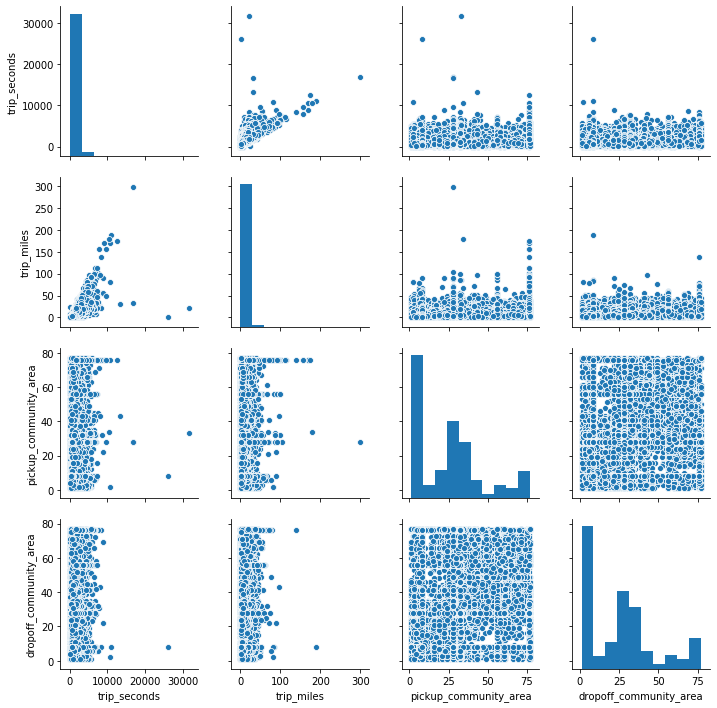

In [18]:
sns.pairplot(ride_data)

In [19]:
ride_data.corr()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area
trip_seconds,1.000000,0.810626,0.198383,0.228519
trip_miles,0.810626,1.000000,0.291431,0.342952
pickup_community_area,0.198383,0.291431,1.000000,0.287631
dropoff_community_area,0.228519,0.342952,0.287631,1.000000


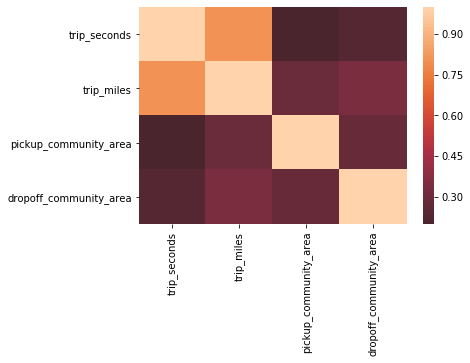

In [20]:
sns.heatmap(ride_data.corr(), center=0)

In [0]:
results_df['start_date'] = [d.date() for d in results_df['trip_start_timestamp']]
results_df['start_time'] = [d.time() for d in results_df['trip_start_timestamp']]

In [22]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time
0,48b8c5efe758f9409c6f0aabd18828c2d38f0ffb,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5,0.0,2.55,10.05,2019-05-20,14:30:00
1,48b8c63e665355f8b45fe446bdad07ffb790e814,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,NaN,15.0,10.0,5.0,2.55,17.55,2019-06-23,10:45:00
2,48b8c8dcda35fda6632c6efb34947a48c2afe4a8,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,NaN,5.0,0.0,2.55,7.55,2019-06-24,19:45:00
3,48b8c90e1a488bde7f99252fefdb39e0bb9670f0,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0,0.0,2.55,12.55,2019-06-15,03:00:00
4,48b8c9c54cb887f865eb64ee0b9d882bd347e34f,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5,0.0,2.55,5.05,2019-05-26,19:45:00


In [23]:
results_df['end_date'] = [d.date() for d in results_df['trip_end_timestamp']]
results_df['end_time'] = [d.time() for d in results_df['trip_end_timestamp']]
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time,end_date,end_time
0,48b8c5efe758f9409c6f0aabd18828c2d38f0ffb,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5,0.0,2.55,10.05,2019-05-20,14:30:00,2019-05-20,14:30:00
1,48b8c63e665355f8b45fe446bdad07ffb790e814,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,NaN,15.0,10.0,5.0,2.55,17.55,2019-06-23,10:45:00,2019-06-23,11:00:00
2,48b8c8dcda35fda6632c6efb34947a48c2afe4a8,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,NaN,5.0,0.0,2.55,7.55,2019-06-24,19:45:00,2019-06-24,20:00:00
3,48b8c90e1a488bde7f99252fefdb39e0bb9670f0,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0,0.0,2.55,12.55,2019-06-15,03:00:00,2019-06-15,03:00:00
4,48b8c9c54cb887f865eb64ee0b9d882bd347e34f,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5,0.0,2.55,5.05,2019-05-26,19:45:00,2019-05-26,19:45:00


In [24]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              992868 non-null float64
trip_miles                999906 non-null float64
pickup_community_area     937437 non-null float64
dropoff_community_area    930766 non-null float64
fare                      1000000 non-null float64
tip                       1000000 non-null float64
additional_charges        1000000 non-null float64
trip_total                1000000 non-null float64
start_date                1000000 non-null object
start_time                1000000 non-null object
end_date                  1000000 non-null object
end_time                  1000000 non-null object
dtypes: datetime64[ns](2), float64(8), object(5)
memory usage: 114.4+ MB


In [25]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              992868 non-null float64
trip_miles                999906 non-null float64
pickup_community_area     937437 non-null float64
dropoff_community_area    930766 non-null float64
fare                      1000000 non-null float64
tip                       1000000 non-null float64
additional_charges        1000000 non-null float64
trip_total                1000000 non-null float64
start_date                1000000 non-null object
start_time                1000000 non-null object
end_date                  1000000 non-null object
end_time                  1000000 non-null object
dtypes: datetime64[ns](2), float64(8), object(5)
memory usage: 114.4+ MB


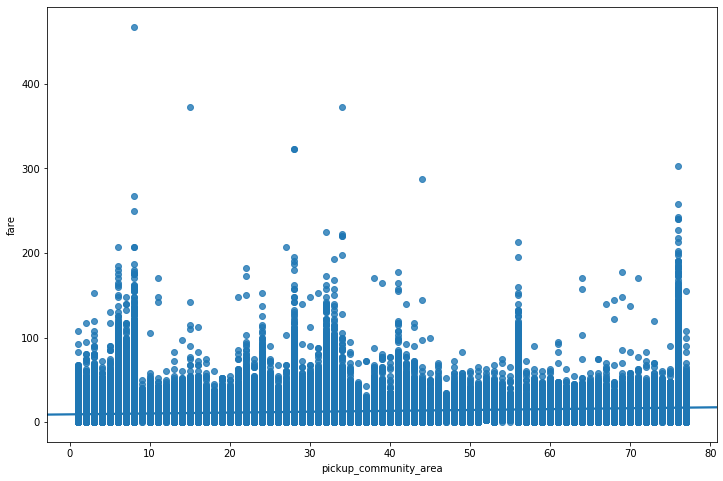

In [26]:
figure = plt.figure(figsize=(12, 8))

x = results_df['pickup_community_area']
y = results_df['fare']
sns.regplot(x, y)

In [0]:
from datetime import time


In [30]:
results_df['fare'].max()

467.5

In [0]:
import math